In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
spoti_df = '/content/gdrive/My Drive/Colab Notebooks/LSMA/P1_Exploratory_Data_Analysis/Spotify_Features.csv'

In [0]:
import pandas as pd

spoti_df = pd.read_csv(spoti_df)

In [0]:
spoti_df.head()

,speechiness,key,time_signature,liveness,loudness,duration_ms,danceability,duration,valence,acousticness,spotify_id,volume_number,energy,tempo,instrumentalness,mode,number,artist,title
0,0.1400,4.0,4.0,0.0521,-6.055,267267.0,0.891,266,0.820,0.20200,spotify:track:1AWQoqb9bSvzTjaLralEkT,13,0.714,100.972,0.000234,0.0,1,Justin Timberlake,Rock Your Body
1,0.0555,10.0,4.0,0.0853,-5.416,222040.0,0.741,221,0.362,0.03980,spotify:track:7AUfOfYTfiHhgg2Pw1aTpw,13,0.575,93.992,0.127000,0.0,2,Jennifer Lopez,I'm Glad
2,0.2160,3.0,4.0,0.0504,-6.562,205000.0,0.676,203,0.533,0.02410,spotify:track:5UrbZaqIsclBE9IAcnG43M,13,0.561,89.947,0.000000,0.0,3,B2K,Girlfriend
3,0.3010,1.0,4.0,0.0518,-4.857,280053.0,0.691,229,0.877,0.01860,spotify:track:6JW8DqCEOWaj8z5AIx4ugf,13,0.858,92.773,0.000000,1.0,4,Jay-Z,Excuse Me Miss
4,0.2440,5.0,4.0,0.0908,-7.114,268333.0,0.573,218,0.578,0.00029,spotify:track:5DLkPmyenHS2uJclC8nPCA,13,0.606,176.449,0.000000,0.0,5,Ginuwine featuring Baby,Hell Yeah


In [0]:
spoti_df.tail()

,speechiness,key,time_signature,liveness,loudness,duration_ms,danceability,duration,valence,acousticness,spotify_id,volume_number,energy,tempo,instrumentalness,mode,number,artist,title
1224,0.0416,2.0,4.0,0.0963,-5.553,203253.0,0.635,202,0.475,0.013800,spotify:track:4TxdDwdVNpLTcXkCflfuHB,22,0.815,122.097,0.0,1.0,16,Saving Jane,Girl Next Door
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,17,Ashley Parker Angel,Let U Go
1226,0.0459,3.0,4.0,0.2600,-3.840,238880.0,0.529,238,0.633,0.000198,spotify:track:2l57cfmCnOkwNX1tky02n1,22,0.922,109.847,0.0,1.0,18,The All-American Rejects,Move Along
1227,0.0276,3.0,4.0,0.4140,-4.088,219320.0,0.441,217,0.543,0.000731,spotify:track:0n2RMFCf3wfKJ9h3E3BKO8,22,0.815,164.021,0.0,1.0,19,Nickelback,Savin' Me
1228,0.0262,7.0,4.0,0.1750,-7.835,259733.0,0.557,258,0.137,0.874000,spotify:track:0BHNSNcbTxQSwxXNnr9oUw,22,0.385,103.730,0.0,1.0,20,Keith Urban,Tonight I Wanna Cry


In [0]:
import pandas_profiling


report = pandas_profiling.ProfileReport(spoti_df)
report

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,19
Number of observations,1229
Total Missing (%),1.9%
Total size in memory,182.6 KiB
Average record size in memory,152.1 B
Numeric,16
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


From the report we can see the correlations:
POSITIVE
- valence and energy strong correlation 
- loudness and enrgy the strongest 
- danceabikty and valence the strongest
- valence and energy strong
- duration and durations 1 --> remove one of the columns since they are the same

 


NEGATIVE
- acousticness and loudness the stronges
- acousticness and energy the strongest
- number and danceability strong 
- tempo and danceability strong 
- duration and volume_number 
- number and speechiness 
- duration and volumen number 


We are oging to remove the time signature since it has only 4 vlaues and does not provide information, as well as distance and distance_ms





In [0]:
spoti_df = spoti_df.drop('duration', axis=1)


In [0]:
spoti_df = spoti_df.drop('time_signature', axis=1)

In [0]:
df_summary = spoti_df.describe()
df_summary

,speechiness,key,liveness,loudness,duration_ms,danceability,valence,acousticness,volume_number,energy,tempo,instrumentalness,mode,number
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1229.000000,1197.000000,1197.000000,1197.000000,1197.000000,1229.000000
mean,0.087622,5.218881,0.188720,-5.432014,230726.954887,0.640473,0.567306,0.123621,31.661513,0.735389,121.229165,0.009155,0.632414,10.596420
std,0.081704,3.619283,0.146907,1.871101,36951.681542,0.134858,0.218734,0.177363,17.605133,0.153227,27.614290,0.063456,0.482349,5.849902
min,0.023300,0.000000,0.021000,-14.001000,102857.000000,0.209000,0.059400,0.000009,1.000000,0.132000,51.316000,0.000000,0.000000,1.000000
25%,0.036700,2.000000,0.088900,-6.362000,206413.000000,0.553000,0.396000,0.009820,16.000000,0.638000,99.898000,0.000000,0.000000,6.000000
50%,0.051900,5.000000,0.131000,-5.162000,226739.000000,0.646000,0.579000,0.049900,32.000000,0.754000,120.034000,0.000000,1.000000,11.000000
75%,0.099800,8.000000,0.251000,-4.150000,247680.000000,0.731000,0.738000,0.166000,47.000000,0.860000,136.960000,0.000017,1.000000,16.000000
max,0.517000,11.000000,0.904000,-1.600000,484147.000000,0.967000,0.968000,0.966000,61.000000,0.991000,210.877000,0.885000,1.000000,22.000000


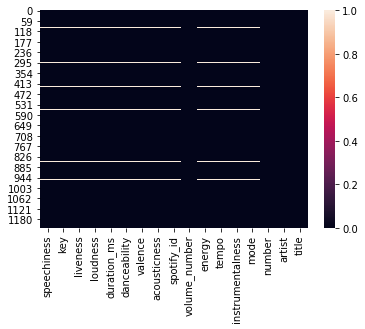

In [0]:
import seaborn as sns
%matplotlib inline

sns.heatmap(spoti_df.isnull())

From the heatmap we see the missing values and they. correspond to the same id song, therefore we can delete that songs



In [0]:
import numpy as np

spoti_df.replace('', np.nan)

,speechiness,key,liveness,loudness,duration_ms,danceability,valence,acousticness,spotify_id,volume_number,energy,tempo,instrumentalness,mode,number,artist,title
0,0.1400,4.0,0.0521,-6.055,267267.0,0.891,0.820,0.202000,spotify:track:1AWQoqb9bSvzTjaLralEkT,13,0.714,100.972,0.000234,0.0,1,Justin Timberlake,Rock Your Body
1,0.0555,10.0,0.0853,-5.416,222040.0,0.741,0.362,0.039800,spotify:track:7AUfOfYTfiHhgg2Pw1aTpw,13,0.575,93.992,0.127000,0.0,2,Jennifer Lopez,I'm Glad
2,0.2160,3.0,0.0504,-6.562,205000.0,0.676,0.533,0.024100,spotify:track:5UrbZaqIsclBE9IAcnG43M,13,0.561,89.947,0.000000,0.0,3,B2K,Girlfriend
3,0.3010,1.0,0.0518,-4.857,280053.0,0.691,0.877,0.018600,spotify:track:6JW8DqCEOWaj8z5AIx4ugf,13,0.858,92.773,0.000000,1.0,4,Jay-Z,Excuse Me Miss
4,0.2440,5.0,0.0908,-7.114,268333.0,0.573,0.578,0.000290,spotify:track:5DLkPmyenHS2uJclC8nPCA,13,0.606,176.449,0.000000,0.0,5,Ginuwine featuring Baby,Hell Yeah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.0416,2.0,0.0963,-5.553,203253.0,0.635,0.475,0.013800,spotify:track:4TxdDwdVNpLTcXkCflfuHB,22,0.815,122.097,0.000000,1.0,16,Saving Jane,Girl Next Door
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,17,Ashley Parker Angel,Let U Go
1226,0.0459,3.0,0.2600,-3.840,238880.0,0.529,0.633,0.000198,spotify:track:2l57cfmCnOkwNX1tky02n1,22,0.922,109.847,0.000000,1.0,18,The All-American Rejects,Move Along
1227,0.0276,3.0,0.4140,-4.088,219320.0,0.441,0.543,0.000731,spotify:track:0n2RMFCf3wfKJ9h3E3BKO8,22,0.815,164.021,0.000000,1.0,19,Nickelback,Savin' Me


In [0]:
spoti_df=spoti_df.dropna()

We have removed the missing values, first we have replaced them with nan and then removed them 


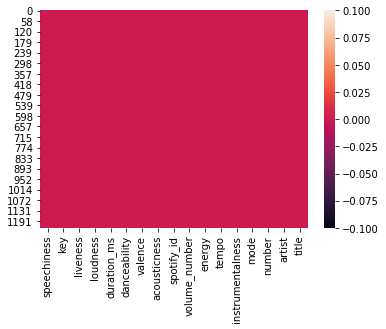

In [0]:
sns.heatmap(spoti_df.isnull())


In [0]:
spoti_df.count()

speechiness         1197
key                 1197
liveness            1197
loudness            1197
duration_ms         1197
danceability        1197
valence             1197
acousticness        1197
spotify_id          1197
volume_number       1197
energy              1197
tempo               1197
instrumentalness    1197
mode                1197
number              1197
artist              1197
title               1197
dtype: int64

We have removed the null rows, so now we dont have missing values, we are going to check the type in each columns to see if theres something weird, but we shouldnt 




In [0]:
spoti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1228
Data columns (total 17 columns):
speechiness         1197 non-null float64
key                 1197 non-null float64
liveness            1197 non-null float64
loudness            1197 non-null float64
duration_ms         1197 non-null float64
danceability        1197 non-null float64
valence             1197 non-null float64
acousticness        1197 non-null float64
spotify_id          1197 non-null object
volume_number       1197 non-null int64
energy              1197 non-null float64
tempo               1197 non-null float64
instrumentalness    1197 non-null float64
mode                1197 non-null float64
number              1197 non-null int64
artist              1197 non-null object
title               1197 non-null object
dtypes: float64(12), int64(2), object(3)
memory usage: 168.3+ KB


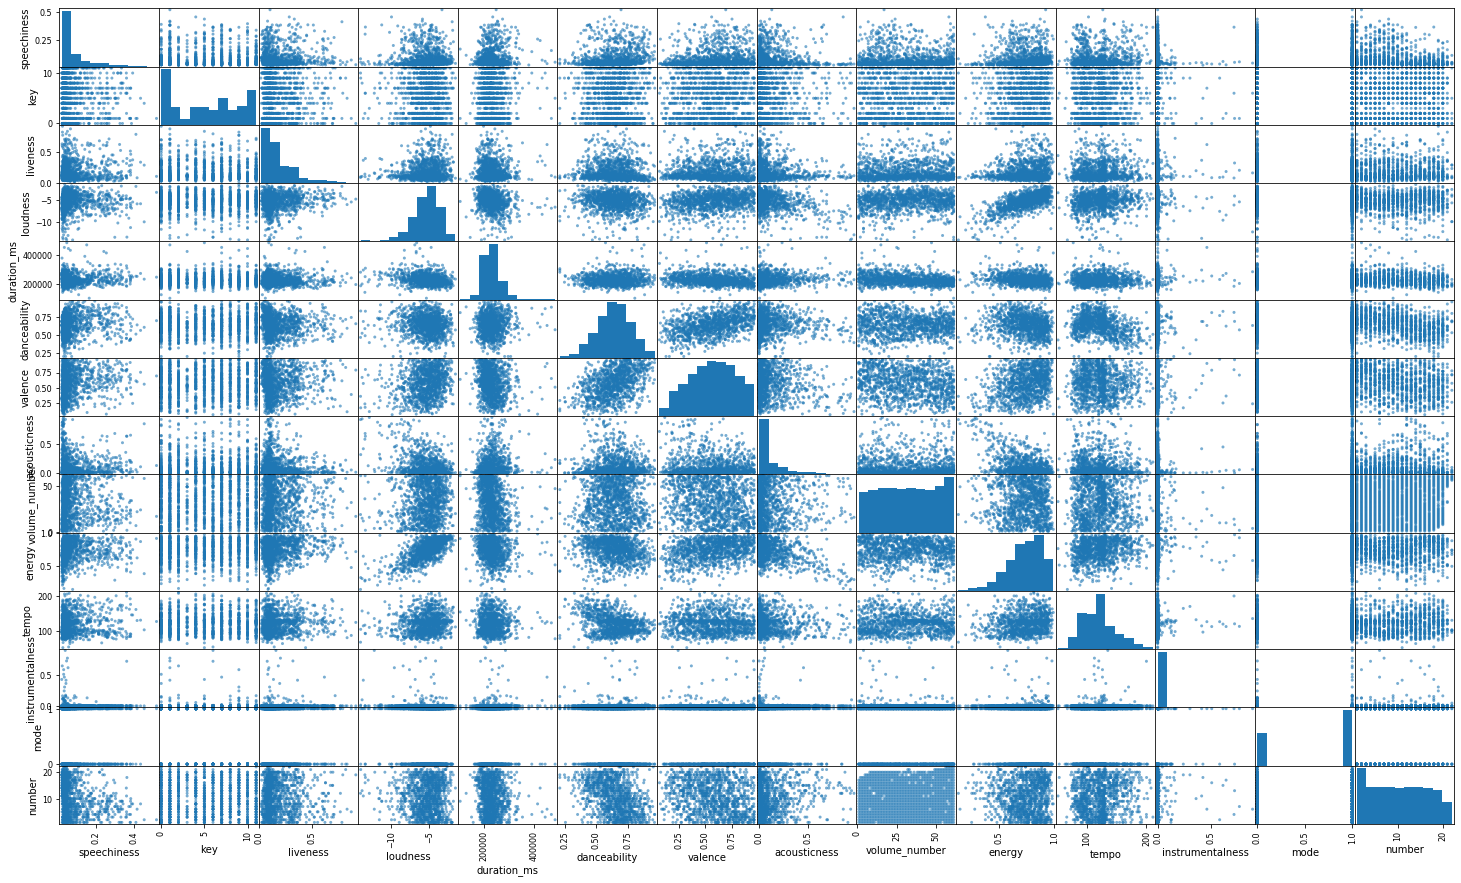

In [0]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(spoti_df, alpha=0.6, figsize=(25,15), diagonal='hist')

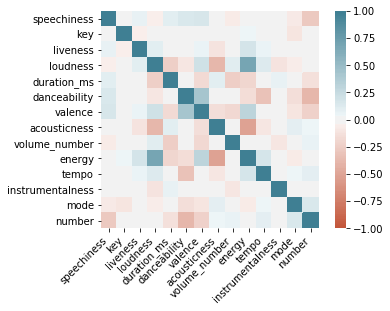

In [0]:
corr = spoti_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Now we will be analyzing each of the conclusions we obtained from the report in pandas profiling verified by the scatter graphs and the heat map


Lets analyze our conclusions and verify if they are correct or we find somethings new. 


# **1. valence and danceability strong correlation**


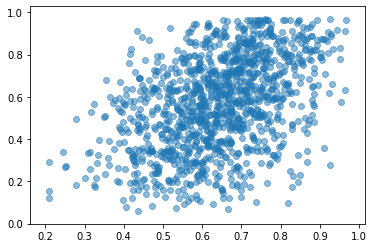

In [0]:
import matplotlib.pyplot as plt


plt.scatter(spoti_df['danceability'], spoti_df['valence'], cmap='hot', alpha=0.5)
plt.show()


From the graph we cannot conclude a close correlation, as in the heat map correlation,  however we can draw an ascending line that could fit most of the points. We are going to see with the box and whisker if we can extract more conclusions



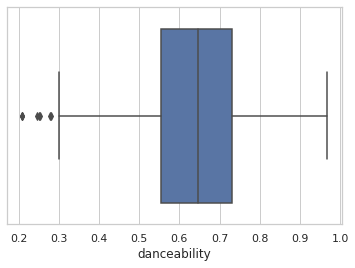

In [0]:
sns.set(style='whitegrid')
ax = sns.boxplot(x='danceability', data=spoti_df)


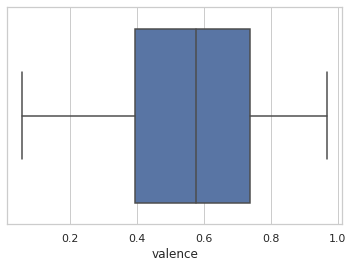

In [0]:
ay = sns.boxplot(x='valence', data=spoti_df)

The box and whiskers can be use to detect outliers, so from the dancebiality we could remove those songs that have a danceability of 0.3, or we could change its value to its mean or mode value. 

From the graph we can see that both danceability and valence have the same common values, so we could see a correlation, as valence indicates how 'happy' a song is and it makes sense that it is highly correlated with dancebility that suggest how danceable a song is. 


## **2. valence and energy strong correlation**

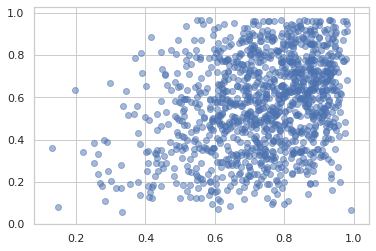

In [0]:
plt.scatter(spoti_df['energy'], spoti_df['valence'], cmap='hot', alpha=0.5)
plt.show()

We cannot make a clear conclusion from the scatter graph, however we can see where the values are concentrated (higher part), which makes sense since being a 'danceable' song means that it has more energy.

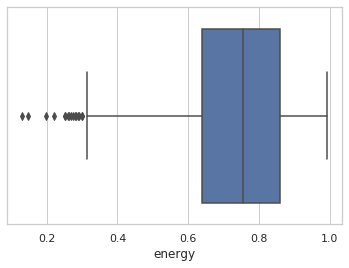

In [0]:
sns.set(style='whitegrid')
ax = sns.boxplot(x='energy', data=spoti_df)

We could remove the outliers to obtain better results, as we said for danceability. 

## **3. loudness and energy the strongest** 

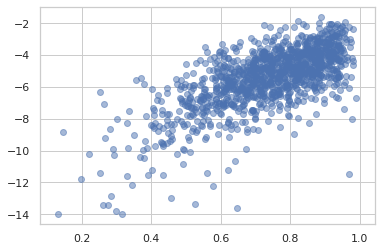

In [0]:
plt.scatter(spoti_df['energy'], spoti_df['loudness'], cmap='hot', alpha=0.5)
plt.show()

From this graph, we can see a linear correlation, as a loud song means that it has more energy, which makes sense as usually loud song suggest more energy. We could also see if loudness and valence also shows a linear correlation.


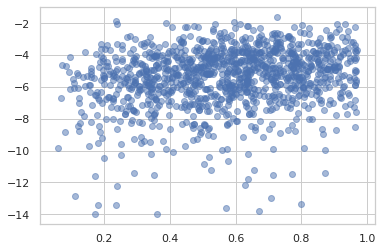

In [0]:
plt.scatter(spoti_df['valence'], spoti_df['loudness'], cmap='hot', alpha=0.5)
plt.show()

## **4. Accoustinicness and energy strong**

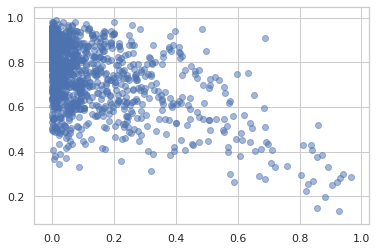

In [0]:
plt.scatter(spoti_df['acousticness'], spoti_df['energy'], cmap='hot', alpha=0.5)
plt.show()


From the heatmap we know that they are negatively correlated, which we can see it from the scatter graph, as the line that fits has a negative slope. The results make sense because when the song is less acoustic the energy is higher. 


## ***5. acousticness and loudness ***

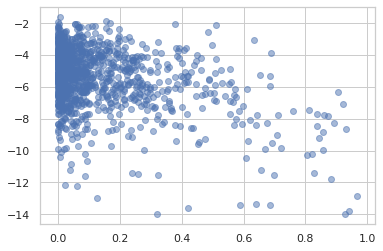

In [0]:
plt.scatter(spoti_df['acousticness'], spoti_df['loudness'], cmap='hot', alpha=0.5)
plt.show()

The graph does not suggest such a strong negative correlation as the heatmap, but we could identify a line that fits most of the points. 


### **Future lines**

In [0]:
With this dataset we could investigate different approaches:
- identify the genre of the songs by the energy, the valence and the danceability 
- identify the mood of the listenner